## Numerical  differentiation : ##

In [8]:
%pylab inline
import numpy as np
from scipy.misc import derivative

Populating the interactive namespace from numpy and matplotlib


In [73]:
def derivate(func,x0,dx=1E-6,n=1,args=(),order=3):
    '''
    Same as scipy derivative but returns the function if
    x0 is an array instead of a list
    '''
    from scipy.misc import derivative
    try:
        nn=np.array(x0).shape[0]
    except IndexError:
        nn=-1
    if nn>-1:
        y=[]
        for xx in x0:
             y.append(derivative(func,xx,dx=dx,n=n,args=args,order=order))
                
        y=np.array(y)   
    else:
        y=derivative(func,x0,dx=dx,n=n,args=args,order=order)
        
    return y

In [83]:
x=np.linspace(0,2*np.pi,100)
func=lambda x: np.cos(x)

#First derivative
funcp=derivate(func,x,dx=1E-6)

#Fourth derivative
funcp4=derivate(func,x,dx=1E-3,n=4,order=5)


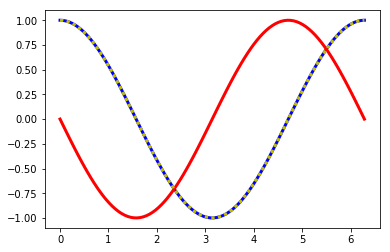

In [114]:
plt.plot( x, func(x), color="blue", label="function", linewidth=3, zorder=10 )
plt.plot( x, funcp, color="red", label="function", linewidth=3, zorder=10 )
plt.plot( x, funcp4, "y:", label="function", linewidth=3, zorder=10 )

El paradigma de programación con Numpy son las las abstracciones, donde los algoritmos se escriben en términos de operaciones con arreglos, evitando el uso de ciclos. Las operaciones a bajo nivel entre arreglos están implementadas en C/Fortran dentro de Numpy. Por consiguiente un código con abstracciones queda automáticamente optimizado.

Consideremos por ejemplo la integración numérica por el método de cuadraturas \cite{fernando} \begin{align} \int_a^b f(x)d x\approx \frac{1}{2}\sum{i=1}^n (xi-x{i-1})(f(xi)+f(x{i-1}))\,. \end{align}

Para implementar las correspondientes abstracciones con NumPy, es conveniente definir los vectores \begin{align} \Delta \mathbf{X}&=(x_1-x_0,x_2-x_1,\cdots,xn-x{n-1})\ \langle\mathbf{F}\rangle&=\frac{1}{2}(f(x_1)+f(x_0),f(x_2)+f(x_1),\cdots,f(xn)+f(x{n-1}))\,. \end{align} Por consiguiente \begin{align} \int_a^b f(x)d x\approx \Delta \mathbf{X}\cdot \langle\mathbf{F}\rangle \end{align}

A continuación presentamos el código con diferentes niveles de abstracciones. El primero test=0 es el más rápido:

In [93]:
import numpy as np
def integracion (f,a,b,npts=4,test=0):
  'integracion numerica de f entre a y b'
  x=np.linspace(a,b,npts)
  y=np.array(map(f,x))
  print (test,' ',npts)
  if test == 0:
    return 0.5*np.dot((x[1:]-x[:-1]),(y[1:]+y[:-1]))
  elif test ==1:
    return 0.5*((x[1:]-x[:-1])*(y[1:]+y[:-1])).sum()
  elif test ==2:
    return 0.5*sum((x[1:]-x[:-1])*(y[1:]+y[:-1]))

In [99]:
import cmath as cm
import numpy as np
import scipy as sp

z=2+3.2j

z.conjugate()


(2-3.2j)

In [100]:
import scipy.integrate as integrate 

In [101]:
integrate.quad?

In [102]:
def f ( x ): 
    return sp . sin ( x )/ x

In [103]:
integrate.quad(f,0,1)

(0.9460830703671831, 1.0503632079297089e-14)

In [109]:
integracion(f,1E-14,1,15)

0   15


IndexError: too many indices for array

In [112]:
import scipy as sp
import scipy.integrate as integrate

Si=lambda t: integrate.quad(lambda x: sp.sin(x)/x,0,t)[0]
Si(1)

0.9460830703671831